# Import the libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,RANSACRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense


plt.rcParams['figure.figsize']=(16,12)
plt.rcParams['figure.dpi']=250
import warnings
warnings.filterwarnings('ignore')

# Load the data set

In [2]:
em=pd.read_csv("temperature_data.csv")

# Variance Inflation Factors

In [3]:
# dropping the column 'profile_id' as it doesnot contributes in predicting the motor_speed
em1=em.drop('profile_id',axis=1)

em1.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [4]:
#Split the data into independent variable X and dependent Y

X = em1.drop('motor_speed',axis=1)
y = em1['motor_speed']

In [5]:
X

,ambient,coolant,u_d,u_q,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725
998066,-0.048839,0.320022,0.331701,-1.250655,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279
998067,-0.042350,0.307415,0.330946,-1.246852,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666
998068,-0.039433,0.302082,0.330987,-1.249505,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581


In [6]:
y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
998065   -1.222428
998066   -1.222437
998067   -1.222430
998068   -1.222432
998069   -1.222431
Name: motor_speed, Length: 998070, dtype: float64

In [7]:
# VIF Calculation

rsq_am = smf.ols('ambient ~ coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_am = 1/(1-rsq_am)

rsq_cnt = smf.ols('coolant ~ ambient+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_cnt = 1/(1-rsq_cnt)

rsq_ud = smf.ols('u_d ~ ambient+coolant+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_ud = 1/(1-rsq_ud)

rsq_uq = smf.ols('u_q ~ ambient+coolant+u_d+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_uq = 1/(1-rsq_uq)

rsq_tq = smf.ols('torque ~ ambient+coolant+u_d+u_q+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_tq = 1/(1-rsq_tq)

rsq_id = smf.ols('i_d ~ ambient+coolant+u_d+u_q+torque+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_id = 1/(1-rsq_id)

rsq_iq = smf.ols('i_q ~ ambient+coolant+u_d+u_q+torque+i_d+pm+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_iq = 1/(1-rsq_iq)

rsq_pm = smf.ols('pm ~ ambient+coolant+u_d+u_q+torque+i_d+i_q+stator_yoke+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_pm = 1/(1-rsq_pm)

rsq_sy = smf.ols('stator_yoke ~ ambient+u_d+u_q+torque+i_d+i_q+pm+stator_tooth+stator_winding',data=em1).fit().rsquared  
vif_sy = 1/(1-rsq_sy)

rsq_st = smf.ols('stator_tooth ~ ambient+coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_winding',data=em1).fit().rsquared  
vif_st = 1/(1-rsq_st)

rsq_sw = smf.ols('stator_winding ~ ambient+coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth',data=em1).fit().rsquared  
vif_sw = 1/(1-rsq_sw)

In [8]:
#Storing vif values in a data frame
d1 = {'Variables':X.columns,'VIF':[vif_am,vif_cnt,vif_ud,vif_uq,vif_tq,vif_id,vif_iq,vif_pm,vif_sy,vif_st,vif_sw]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,ambient,1.591301
1,coolant,39.200092
2,u_d,4.663596
3,u_q,1.494069
4,torque,260.458613
5,i_d,2.975567
6,i_q,230.363548
7,pm,4.233975
8,stator_yoke,91.941748
9,stator_tooth,642.335550


The VIF of coolant,torque,i_q,stator_yoke,stator_tooth,stator_winding is too high so shall remove these features for further analysis.

In [9]:
X.drop(['coolant','stator_yoke','stator_tooth','stator_winding'],axis=1,inplace=True)
X

,ambient,u_d,u_q,torque,i_d,i_q,pm
0,-0.752143,0.327935,-1.297858,-0.250182,1.029572,-0.245860,-2.522071
1,-0.771263,0.329665,-1.297686,-0.249133,1.029509,-0.245832,-2.522418
2,-0.782892,0.332771,-1.301822,-0.249431,1.029448,-0.245818,-2.522673
3,-0.780935,0.333700,-1.301852,-0.248636,1.032845,-0.246955,-2.521639
4,-0.774043,0.335206,-1.303118,-0.248701,1.031807,-0.246610,-2.521900
...,...,...,...,...,...,...,...
998065,-0.047497,0.331475,-1.246114,-0.255640,1.029142,-0.245723,0.429853
998066,-0.048839,0.331701,-1.250655,-0.255640,1.029148,-0.245736,0.429751
998067,-0.042350,0.330946,-1.246852,-0.255640,1.029191,-0.245701,0.429439
998068,-0.039433,0.330987,-1.249505,-0.255640,1.029147,-0.245727,0.429558


In [10]:
##### We shall further use Feature Selection as there was no much correlation between the motor_speed to other independent variables

# Feature Selection

In [11]:
#Lasso

l1 = Lasso(alpha=0.3)
l1.fit(X,y)

l1_coeff = pd.DataFrame() 
l1_coeff["Features"] = X.columns 
l1_coeff['Coefficient Estimate'] = pd.Series(l1.coef_) 

print(l1_coeff) 

  Features  Coefficient Estimate
0  ambient              0.000000
1      u_d             -0.000000
2      u_q              0.352318
3   torque             -0.000000
4      i_d             -0.359642
5      i_q             -0.000000
6       pm              0.000000


In [12]:
#Elastic net

en = ElasticNet()
en.fit(X,y)

en_coeff = pd.DataFrame() 
en_coeff["Columns"] = X.columns 
en_coeff['Coefficient Estimate'] = pd.Series(en.coef_) 
en_coeff

,Columns,Coefficient Estimate
0,ambient,0.000000
1,u_d,-0.000000
2,u_q,0.129734
3,torque,-0.000000
4,i_d,-0.133145
5,i_q,-0.000000
6,pm,0.000000


In [13]:
##### We shall continue with the features u_q and i_d for model-building

In [14]:
# Scaling the features u_q and i_d
sc_X = StandardScaler()
X_scale= sc_X.fit_transform(X[['u_q','i_d']])
X_scale

array([[-1.28916442,  1.02456032],
       [-1.28899382,  1.02449686],
       [-1.29311941,  1.0244355 ],
       ...,
       [-1.23827738,  1.02417824],
       [-1.24092411,  1.02413439],
       [-1.23801658,  1.02412829]])

In [15]:
# Splitting the train test data
x_train, x_test, y_train, y_test = train_test_split(X_scale,y,test_size = 0.2,random_state=10)

# Linear Regression

In [16]:
lr=LinearRegression()
lr.fit(x_train,y_train)
ypred1=lr.predict(x_test)

r2_ln=r2_score(y_test,ypred1)
ln_mse=mean_squared_error(y_test,ypred1)
ln_rmse=np.sqrt(ln_mse)

print("R_square : ",r2_ln)
print("Mean Square Error: ",ln_mse)
print("Root Mean Square Error: ",ln_rmse)

R_square :  0.8775073316541532
Mean Square Error:  0.1227083175633508
Root Mean Square Error:  0.35029747010698037


# Robust Regression

In [17]:
rb=RANSACRegressor(base_estimator=LinearRegression())
rb.fit(x_train, y_train)
ypred_rb=rb.predict(x_test)

r2_rb=r2_score(y_test,ypred_rb)
rb_mse=mean_squared_error(y_test,ypred_rb)
rb_rmse=np.sqrt(rb_mse)

print("R_square : ",r2_rb)
print("Mean Square Error: ",rb_mse)
print("Root Mean Square Error: ",rb_rmse)

R_square :  0.8712315764709306
Mean Square Error:  0.12899512125839682
Root Mean Square Error:  0.3591589080872098


# KNN

In [18]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
ypred_knn=knn.predict(x_test)

r2_knn=r2_score(y_test,ypred_knn)
knn_mse=mean_squared_error(y_test,ypred_knn)
knn_rmse=np.sqrt(knn_mse)

print("R_square : ",r2_knn)
print("Mean Square Error: ",knn_mse)
print("Root Mean Square Error: ",knn_rmse)

R_square :  0.9870682869158895
Mean Square Error:  0.012954479457357433
Root Mean Square Error:  0.11381774667141074


# Decision Tree

In [19]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
ypred_dt=dt.predict(x_test)
r2_dt=r2_score(y_test,ypred_dt)
dt_mse=mean_squared_error(y_test,ypred_dt)
dt_rmse=np.sqrt(dt_mse)
print("R_square : ",r2_dt)
print("Mean Square Error: ",dt_mse)
print("Root Mean Square Error: ",dt_rmse)

R_square :  0.9782199998766616
Mean Square Error:  0.021818343969115087
Root Mean Square Error:  0.1477103380576833


# Random Forest

In [20]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
ypred_rf = model.predict(x_test)

In [21]:
r2_rf=r2_score(y_test,ypred_rf)
rf_mse=mean_squared_error(y_test,ypred_rf)
rf_rmse=np.sqrt(rf_mse)
print("R_square : ",r2_rf)
print("Mean Square Error: ",rf_mse)
print("Root Mean Square Error: ",rf_rmse)

R_square :  0.9870323382987573
Mean Square Error:  0.012990491362286945
Root Mean Square Error:  0.11397583674747444


# Polynomial Regression

In [23]:
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit_transform(x_train)
x_train_poly=poly_reg.transform(x_train)
x_test_poly=poly_reg.transform(x_test)

plr = LinearRegression()
plr.fit(x_train_poly,y_train)
plr.predict(x_test_poly)
ypred_plr=plr.predict(x_test_poly)

r2_plr=r2_score(y_test,ypred_plr)
plr_mse=mean_squared_error(y_test,ypred_plr)
plr_rmse=np.sqrt(plr_mse)

print("R_square : ",r2_plr)
print("Mean Square Error: ",plr_mse)
print("Root Mean Square Error: ",plr_rmse)

R_square :  0.9526047979276496
Mean Square Error:  0.0474786416641102
Root Mean Square Error:  0.2178959422846378


#  Neural Networks

In [24]:
model=Sequential()
model.add(Dense(10,input_dim=2,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Adam')

In [25]:
# Fit the model
model.fit(x_train,y_train)

24952/24952 [==============================] - 58s 2ms/step - loss: 0.0427


In [26]:
ypred_nn=model.predict(x_test)

6238/6238 [==============================] - 13s 2ms/step


In [27]:
r2_nn=r2_score(y_test,ypred_nn)
nn_mse=mean_squared_error(y_test,ypred_nn)
nn_rmse=np.sqrt(nn_mse)

print("R_square : ",r2_nn)
print("Mean Square Error: ",nn_mse)
print("Root Mean Square Error: ",nn_rmse)

R_square :  0.9672501593733731
Mean Square Error:  0.03280749695495966
Root Mean Square Error:  0.1811283990846263


# Storing the results in the table format

In [28]:
result_df=pd.DataFrame()
result_df['Models']=['Linear Regression','Robust Regression','KNN','Decision Tree','Random Forest','Polynomial Regression','Neural Network']
result_df['R_square values']=[r2_ln,r2_rb,r2_knn,r2_dt,r2_rf,r2_plr,r2_nn]
result_df['Mean Square Error']=[ln_mse,rb_mse,knn_mse,dt_mse,rf_mse,plr_mse,nn_mse]
result_df['Root Mean Square Error']=[ln_rmse,rb_rmse,knn_rmse,dt_rmse,rf_rmse,plr_rmse,nn_rmse]
result_df

,Models,R_square values,Mean Square Error,Root Mean Square Error
0,Linear Regression,0.877507,0.122708,0.350297
1,Robust Regression,0.871232,0.128995,0.359159
2,KNN,0.987068,0.012954,0.113818
3,Decision Tree,0.978220,0.021818,0.147710
4,Random Forest,0.987032,0.012990,0.113976
5,Polynomial Regression,0.952605,0.047479,0.217896
6,Neural Network,0.967250,0.032807,0.181128


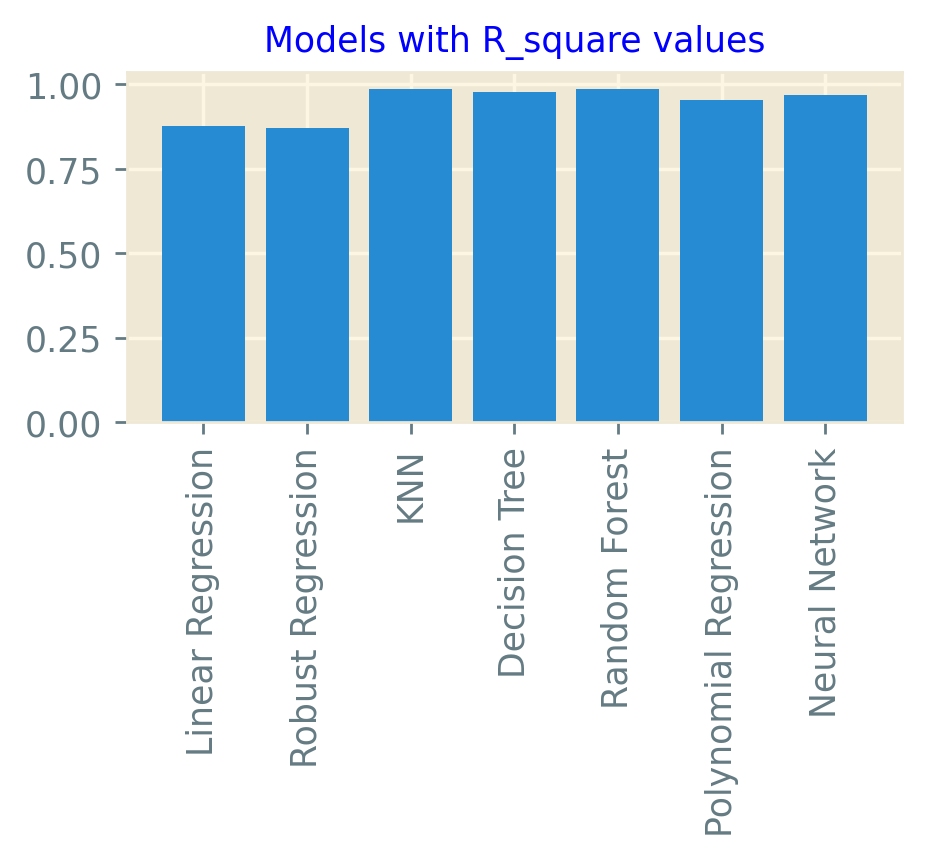

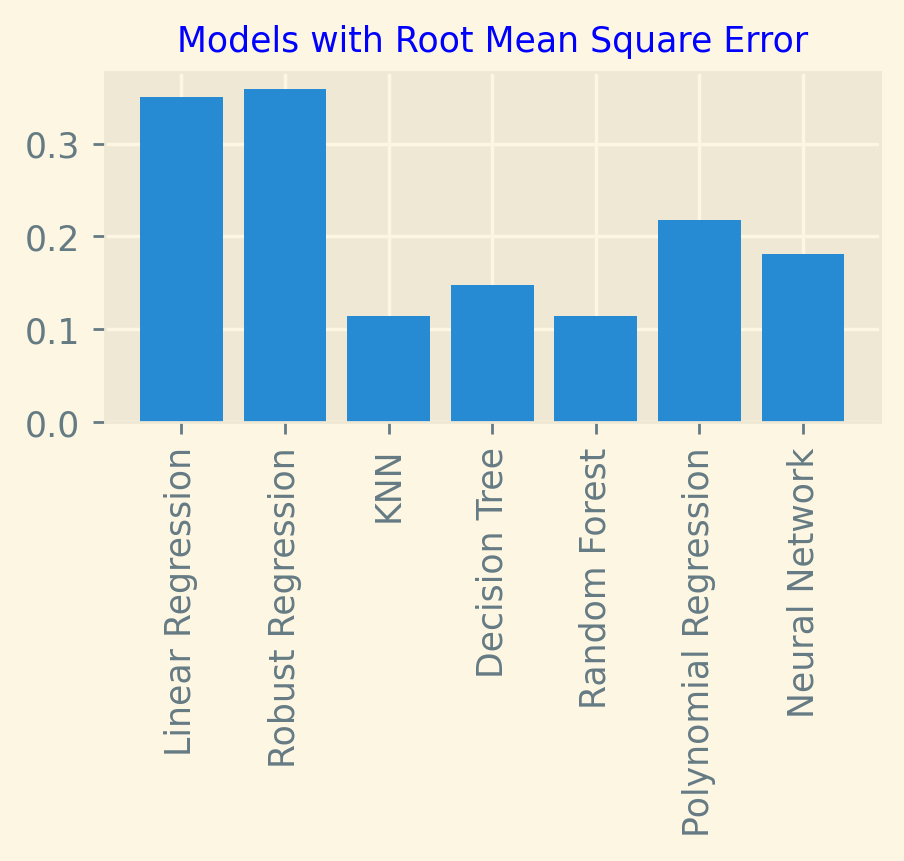

In [29]:
plt.figure(figsize=(4,4))
plt.style.use('Solarize_Light2')
plt.subplot(2,1,1)
plt.bar(result_df['Models'],result_df['R_square values'])
plt.title('Models with R_square values',fontdict={'color':'blue','size':10})
plt.xticks(rotation=90)
print()
plt.figure(figsize=(4,4))
plt.subplot(2,1,2)
plt.bar(result_df['Models'],result_df['Root Mean Square Error'])
plt.title('Models with Root Mean Square Error',fontdict={'color':'blue','size':10})
plt.xticks(rotation=90)
plt.show()

##### Here KNN regression model is giving the higher R-square and lower Mean-square value  hence we are choosing KNN fot the Model Building

# Tunning the Hyperparameter

In [30]:
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knn=KNeighborsRegressor()

model=GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 19}

After using the GridsearchCV we got 19 As the best N value

In [31]:
# Model building
model=KNeighborsRegressor(n_neighbors=19)
model.fit(x_train,y_train)
ypred=model.predict(x_test)

# Calculating R2 score,MSE and RMSE
r2=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)

# Printing R2 score,MSE and RMSE
print("R_square : ",np.round(r2,2))
print("Mean Square Error: ",np.round(mse,2))
print("Root Mean Square Error: ",np.round(rmse,2))

R_square :  0.99
Mean Square Error:  0.01
Root Mean Square Error:  0.11


In [32]:
# Storing y_test and ypred values in a Dataframe
df=pd.DataFrame()
df['Actual speed']=y_test
df['Predicted speed']=ypred
df.reset_index(drop=True)

,Actual speed,Predicted speed
0,1.016238,0.231143
1,0.390618,0.403453
2,-1.222436,-1.222428
3,-1.222428,-1.222430
4,-1.222430,-1.222377
...,...,...
199609,1.104264,1.104267
199610,-1.222430,-1.222431
199611,0.378563,0.453108
199612,1.267056,1.324418


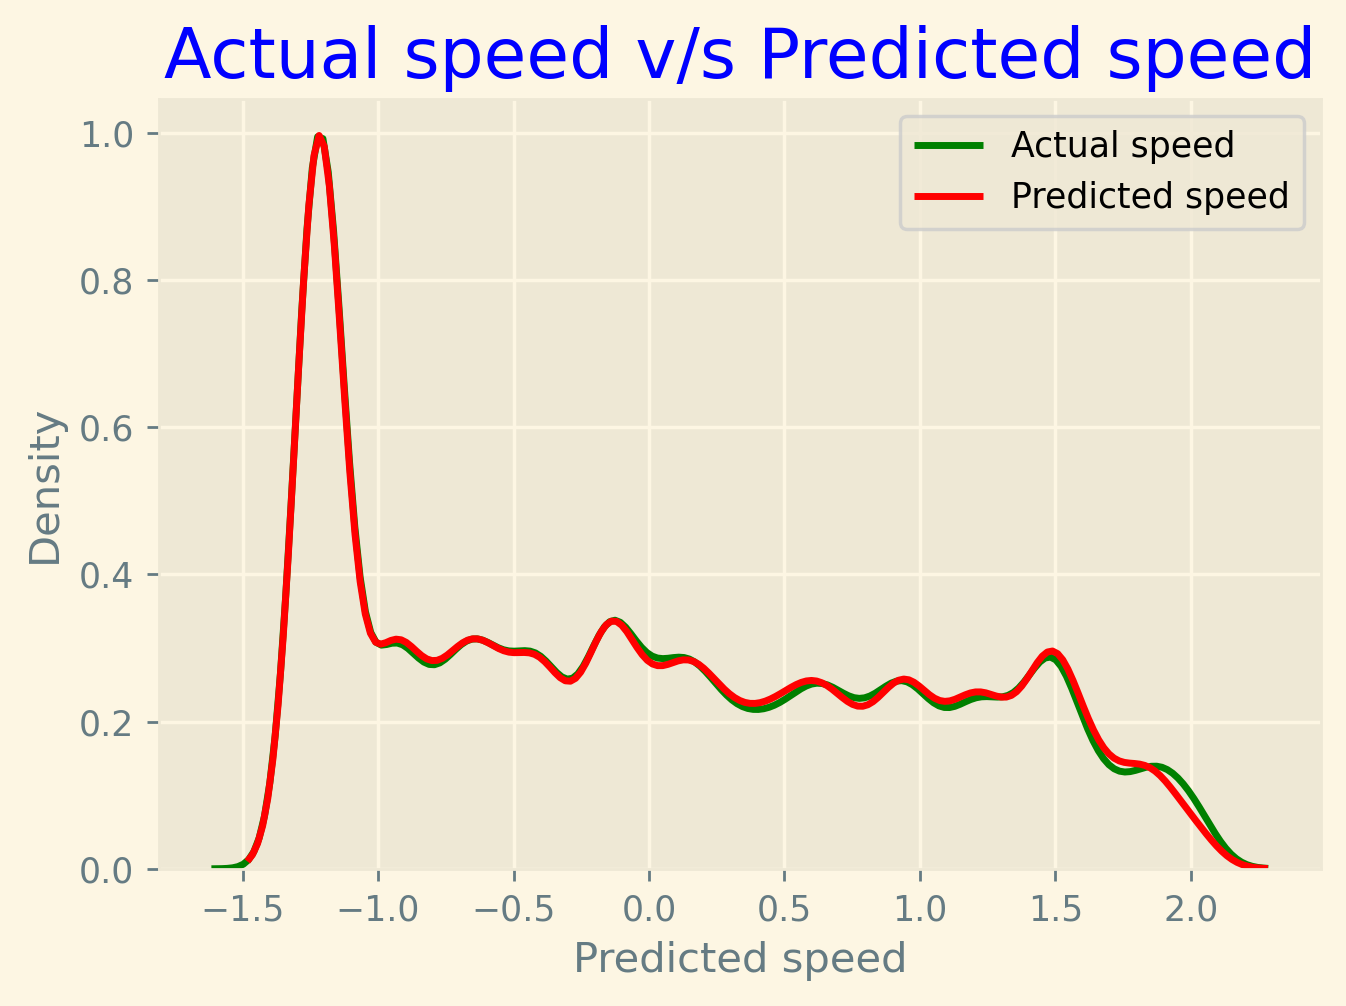

In [33]:
plt.figure(figsize=(6,4))
sns.distplot(df['Actual speed'],hist=False,color='green')
sns.distplot(df['Predicted speed'],hist=False,color='red')
plt.legend(['Actual speed','Predicted speed'])
plt.title("Actual speed v/s Predicted speed",fontdict={'color':'blue','size':20})
plt.show()

#### Here the actual and predicted values are alomost overlapping this shows that the model is performing well

Text(0, 0.5, 'Predicted speed')

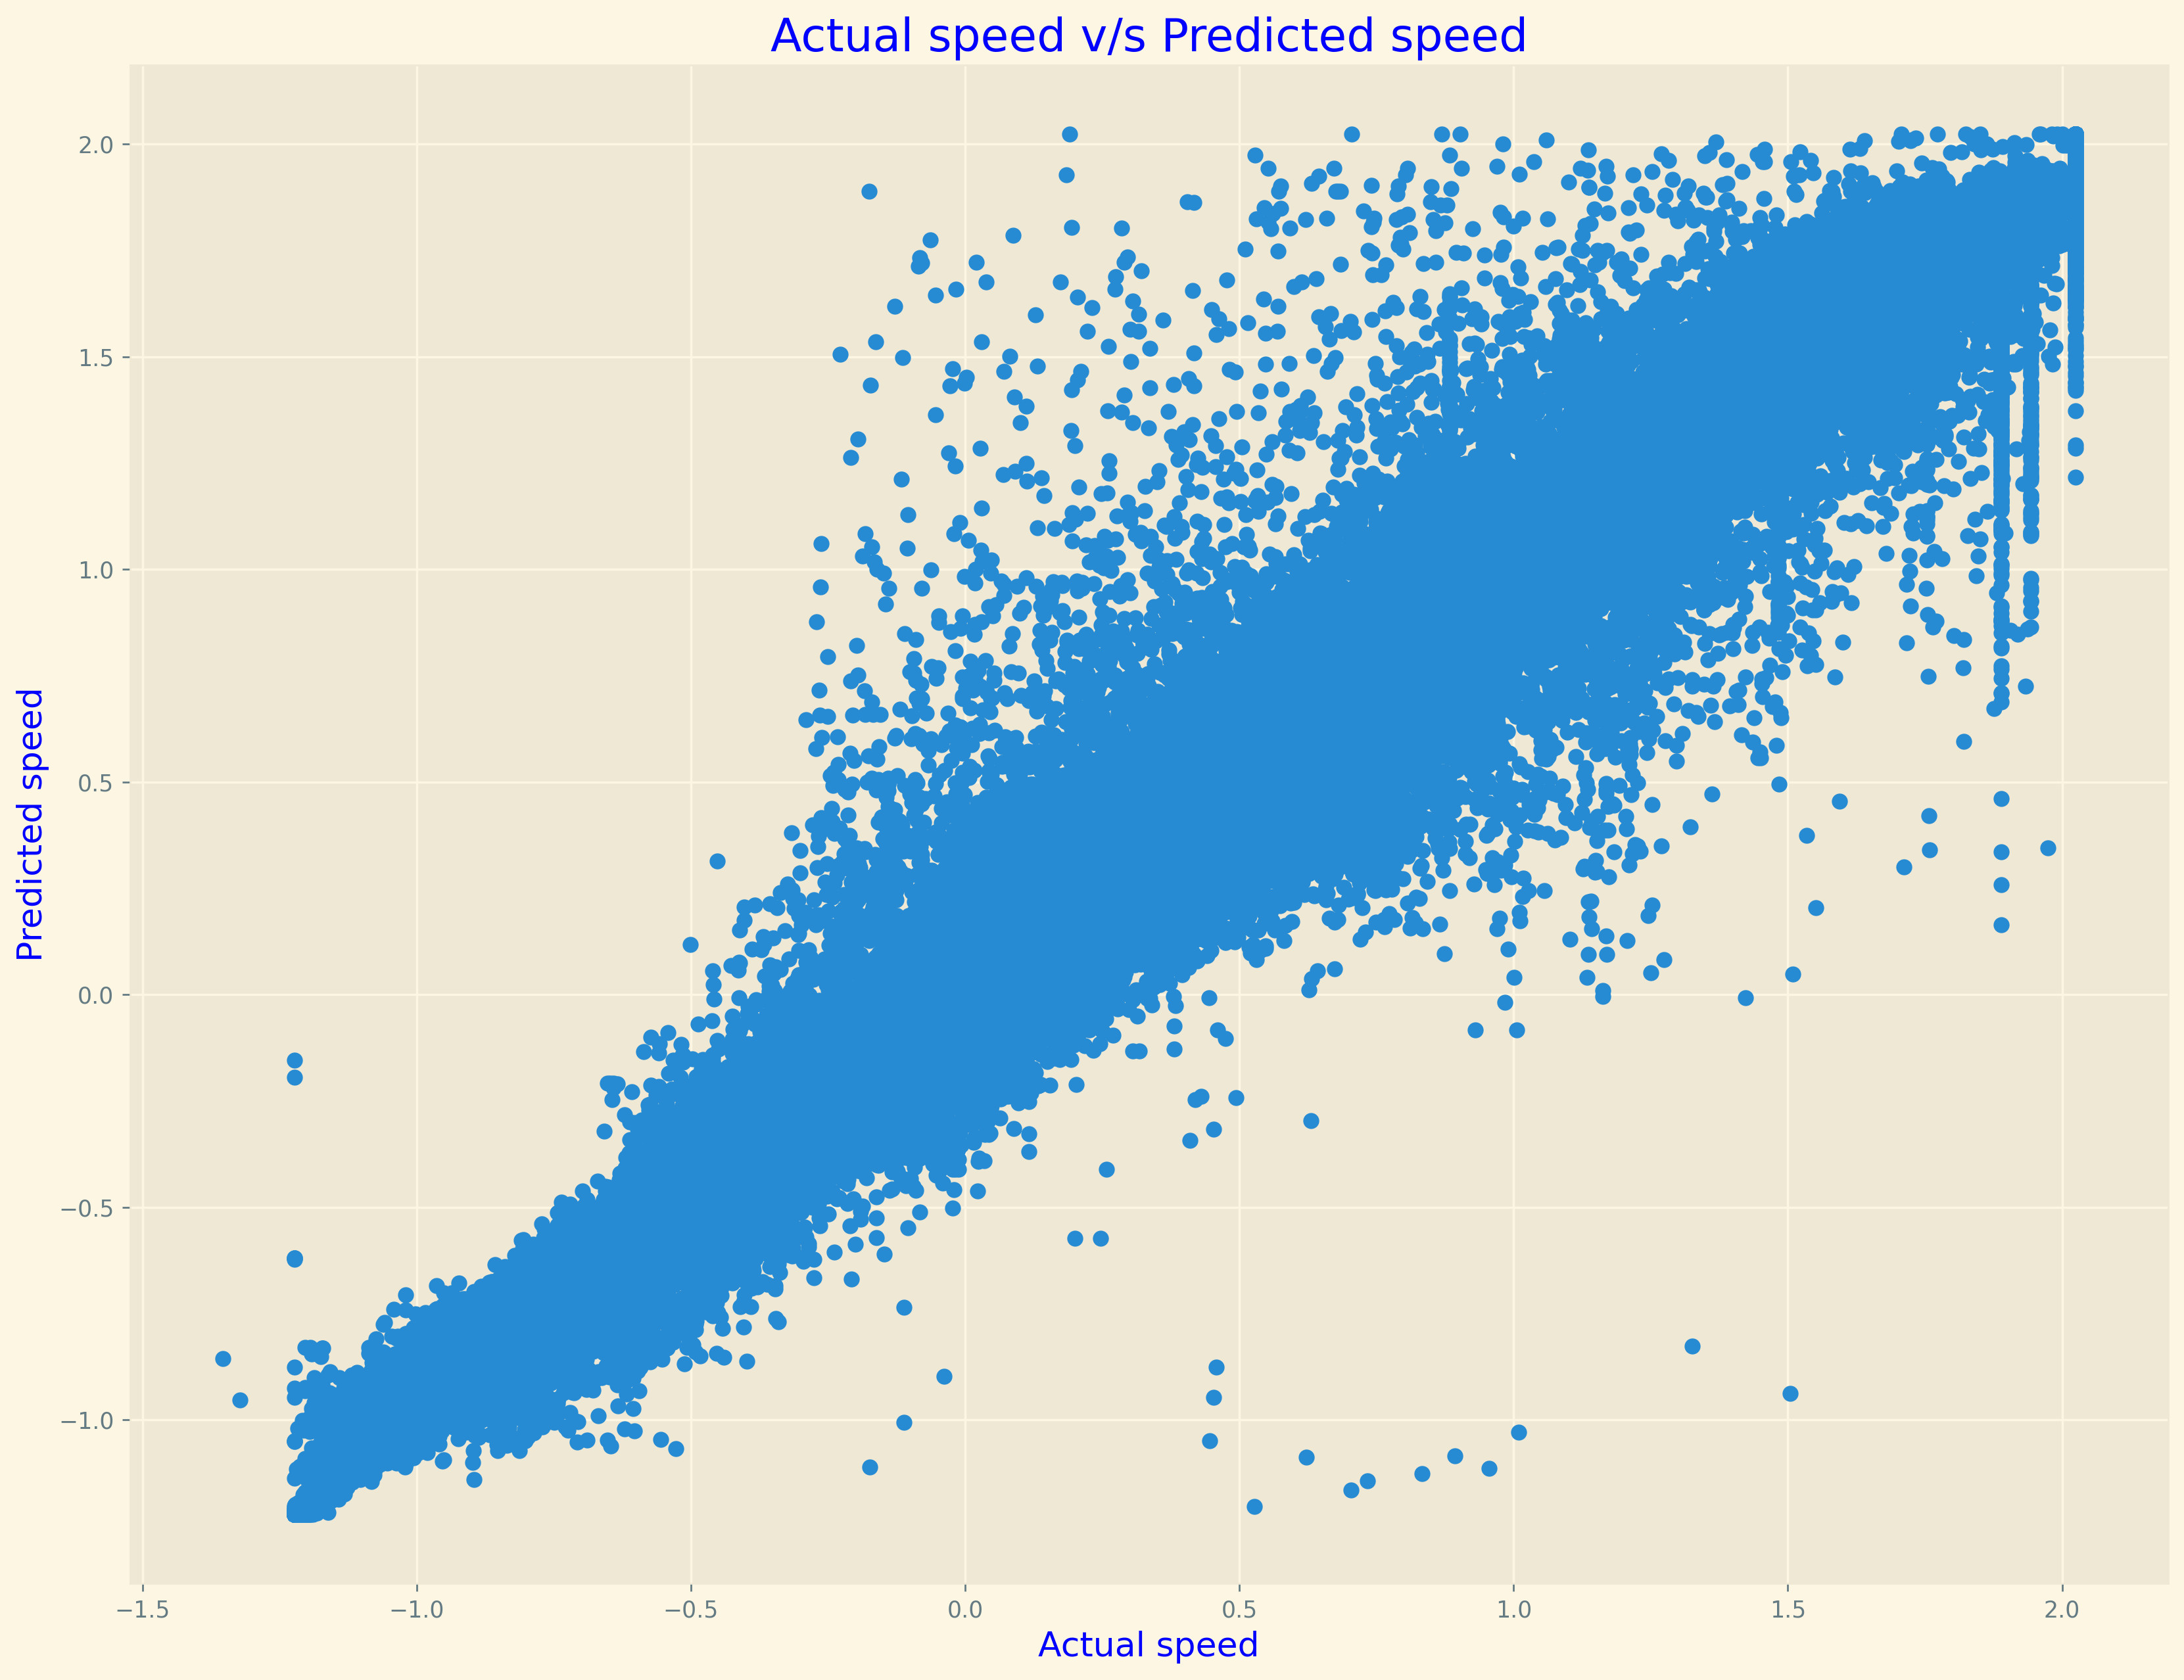

In [34]:
# Plotting Actual and Predicted values
plt.scatter(x=y_test,y=ypred)
plt.title("Actual speed v/s Predicted speed",fontdict={'color':'blue','size':20})
plt.xlabel("Actual speed",fontdict={'color':'blue','size':15})
plt.ylabel("Predicted speed",fontdict={'color':'blue','size':15})

# Validating the Model
#### Using KFold

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_scale,y, cv=kfold)
results

array([0.97873223, 0.89688713, 0.93564984, 0.9839923 , 0.95811524,
       0.96763912, 0.98468888, 0.98554548, 0.98470373, 0.98878585])

In [36]:
results.mean()

0.9664739797941875

In [37]:
mod=[1,2,3,4,5,6,7,8,9,10]

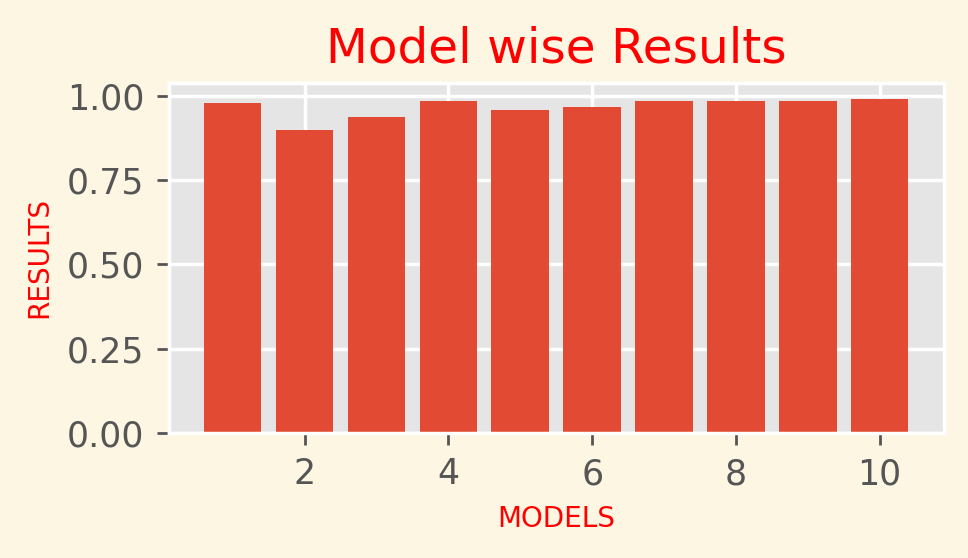

In [38]:
plt.figure(figsize=(4,4))
plt.style.use('ggplot')
plt.subplot(2,1,1)
plt.bar(mod,results)
plt.title('Model wise Results',fontdict={'color':'r','size':14})
plt.xlabel('MODELS',fontdict={'color':'r','size':8})
plt.ylabel('RESULTS',fontdict={'color':'r','size':8})
plt.show()
print()

# Final model 

In [39]:
final_model=KNeighborsRegressor(n_neighbors=19)
final_model.fit(X_scale,y)

ypred=final_model.predict(X_scale)

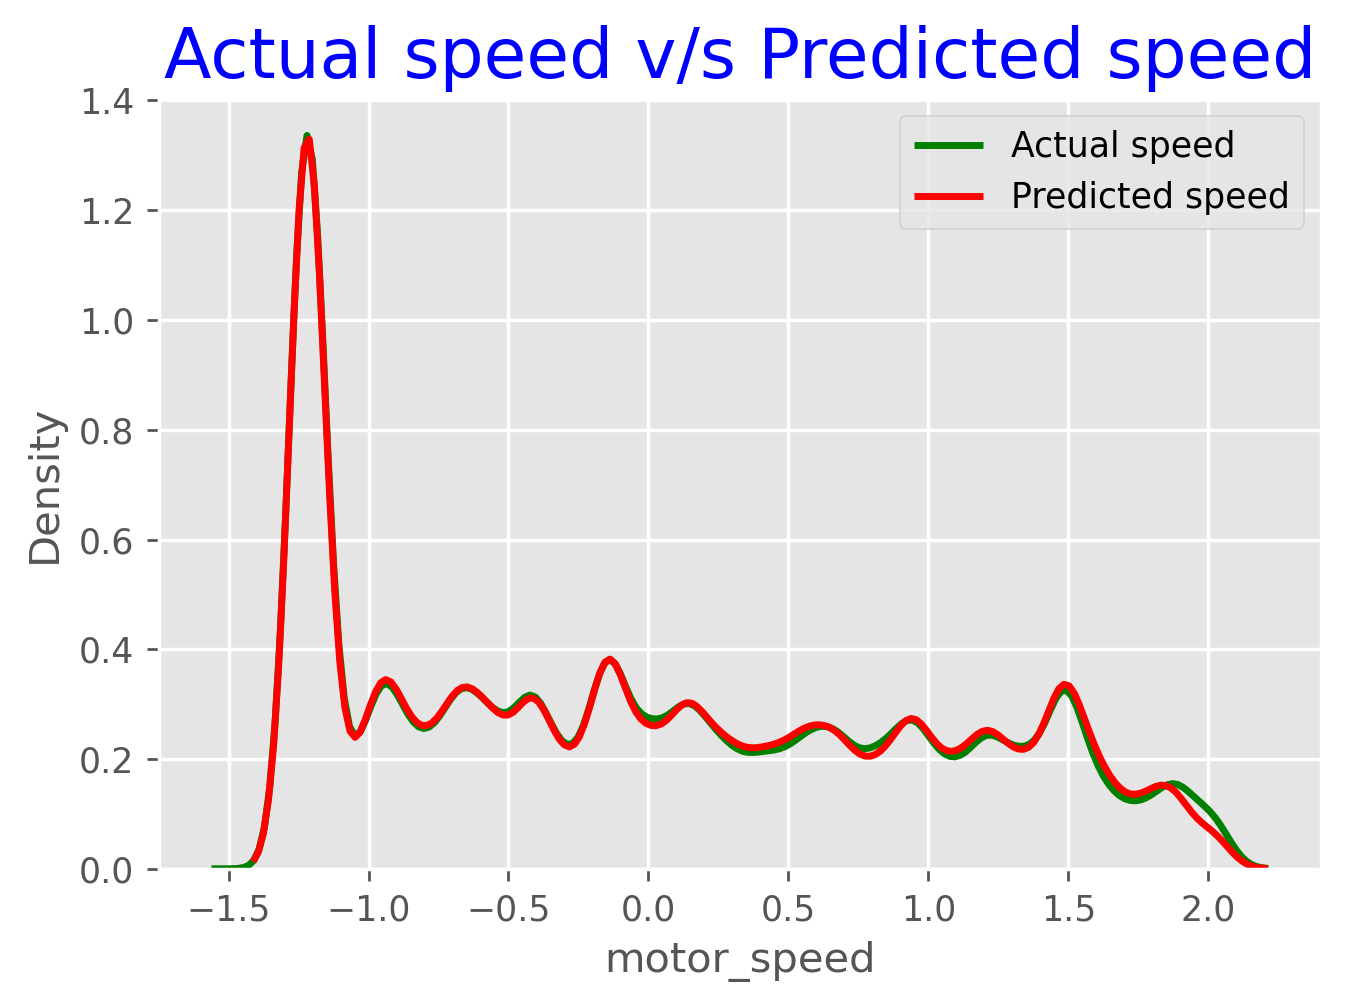

In [40]:
plt.figure(figsize=(6,4))
sns.distplot(y,hist=False,color='green')
sns.distplot(ypred,hist=False,color='red')
plt.legend(['Actual speed','Predicted speed'])
plt.title("Actual speed v/s Predicted speed",fontdict={'color':'blue','size':20})
plt.show()

In [41]:
#saving the model for deployment

In [42]:
import pickle 
pickle_out = open("pmsm.pkl","wb") 
pickle.dump(final_model, pickle_out) 
#load=pickle.load(open("pmsm.pkl","rb"))